# Titanic Data Preprocessing

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Load the Titanic dataset
df = pd.read_csv('C:\\Users\\PMYLS\\Titanic-Dataset.csv')

# Explore the dataset

In [11]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
print("\nShape of the dataset:", df.shape)


Shape of the dataset: (891, 12)


In [13]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37345

In [14]:
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [15]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
print("\nUnique values in 'Embarked':", df['Embarked'].unique())


Unique values in 'Embarked': ['S' 'C' 'Q' nan]


In [17]:
print("Unique values in 'Sex':", df['Sex'].unique())

Unique values in 'Sex': ['male' 'female']


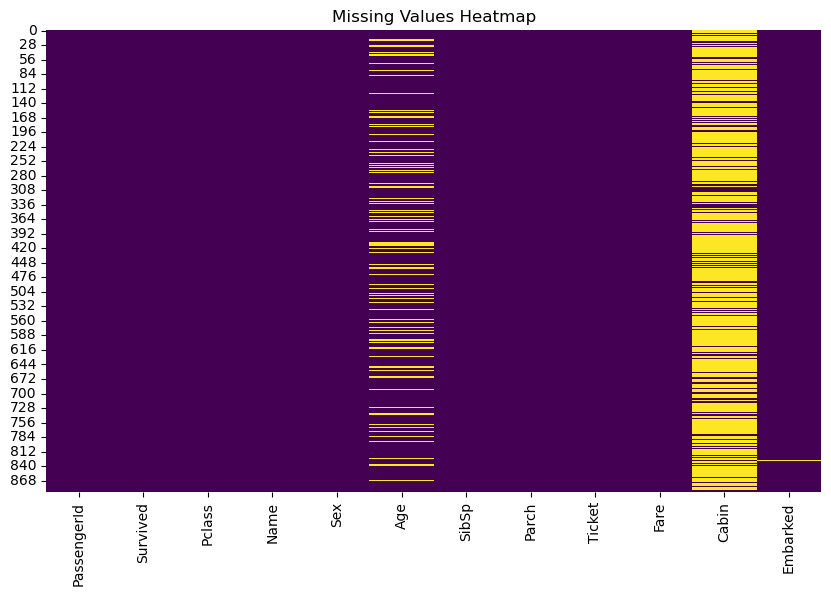

In [18]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [24]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [25]:
# Check if 'Cabin' column exists before dropping it
if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)


In [26]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
# Normalize data
scaler = MinMaxScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [28]:
# Encode categorical variables
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [29]:
# Display the cleaned dataset
print("\nCleaned dataset:")
print(df.head())


Cleaned dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0  0.271174      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.472229      1   
2                             Heikkinen, Miss. Laina    1  0.321438      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.434531      1   
4                           Allen, Mr. William Henry    0  0.434531      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171  0.014151       False        True  
1      0          PC 17599  0.139136       False       False  
2      0  STON/O2. 3101282  0.015469       False        True  
3      0            113803  0.103644       F

In [ ]:
# Save the cleaned dataset
df.to_csv('cleaned_titanic.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_titanic.csv'.")
